In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch

# Load the csv files for NES and Apache Flink
df_nes = pd.read_csv("nebulastream_e2e.csv")
df_flink = pd.read_csv("flink_e2e.csv")

df_nes['system'] = 'NebulaStream'
df_flink['system'] = 'Flink'

# Rename columns for consistency
df_nes = df_nes.rename(columns={'numberOfWorkerThreads': 'parallelism', 'tuplesPerSecond': 'tuplesPerSecond_e2e', 'tuplesPerSecond_listener': 'tuplesPerSecond'})
df_flink = df_flink.rename(columns={'numOfRecords': 'numberOfRecords'})
df_flink['tuplesPerSecond_e2e'] = df_flink['tuplesPerSecond']

# Concatenate the dataframes
df_concatenated = pd.concat([df_nes, df_flink], ignore_index=True)

# Create directory if it doesn't exist
output_dir = 'system_comparison'
os.makedirs(output_dir, exist_ok=True)

hue_order = ['NebulaStream', 'Flink']
custom_palette = ["#7402d8", "#ba9344"]
legend_handles = [
    Patch(facecolor=custom_palette[0], label='NebulaStream'),
    Patch(facecolor=custom_palette[1], label='Flink')
]

df_concatenated['query_name'] = df_concatenated['query_name'].str.replace('NM8_Variant', 'NM8\n(Variant)')
df_concatenated

,bytesPerSecond,query_name,time,tuplesPerSecond_e2e,tuplesPerSecond,executionMode,parallelism,buffersInGlobalBufferManager,joinStrategy,numberOfEntriesSliceCaches,sliceCacheType,bufferSizeInBytes,pageSize,system,numberOfRecords
0,1.892856e+08,CM1,8.071201,2.310568e+06,2.338414e+06,COMPILER,1,20000.0,HASH_JOIN,5.0,NONE,1048576.0,8192.0,NebulaStream,NaN
1,1.892856e+08,CM1,8.071201,2.310568e+06,2.338414e+06,COMPILER,1,20000.0,HASH_JOIN,5.0,NONE,1048576.0,8192.0,NebulaStream,NaN
2,3.534055e+08,CM1,4.322972,4.313943e+06,4.781135e+06,COMPILER,1,20000.0,HASH_JOIN,5.0,SECOND_CHANCE,1048576.0,8192.0,NebulaStream,NaN
3,3.534055e+08,CM1,4.322972,4.313943e+06,4.781135e+06,COMPILER,1,20000.0,HASH_JOIN,5.0,SECOND_CHANCE,1048576.0,8192.0,NebulaStream,NaN
4,2.360089e+08,CM1,6.473323,2.880909e+06,2.888752e+06,COMPILER,2,20000.0,HASH_JOIN,5.0,NONE,1048576.0,8192.0,NebulaStream,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,NaN,NM8\n(Variant),NaN,9.317930e+05,9.317930e+05,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0
371,NaN,NM8\n(Variant),NaN,1.241744e+06,1.241744e+06,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0
372,NaN,NM8\n(Variant),NaN,2.101198e+06,2.101198e+06,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0
373,NaN,NM8\n(Variant),NaN,2.462213e+06,2.462213e+06,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,Flink,20000000.0


15 2305129.0 7 2.9369554588918887 0
16 853707.0 8 16.64622639851846 1
17 284336.0 8 82.70848573518654 2
18 1130869.0 9 77.48731285409715 3
19 176949.0 9 84.75040830973896 4
20 25001.0 10 280.29851405943765 5
21 17091.0 10 190.42838444318755 6
22 338790.0 11 47.38554856991056 7
23 8613297.0 11 -1.1609956094629037e-07 8
24 8532161.0 12 -1.1720360176044498e-07 9
25 4856945.0 12 42.08108183230405 10
26 2120603.0 13 15.778530917856855 11
27 1415534.0 13 6.065908695940895 12
28 2035617.0 14 -4.912515468283081e-07 13
29 2028299.0 14 -4.930239575131675e-07 14


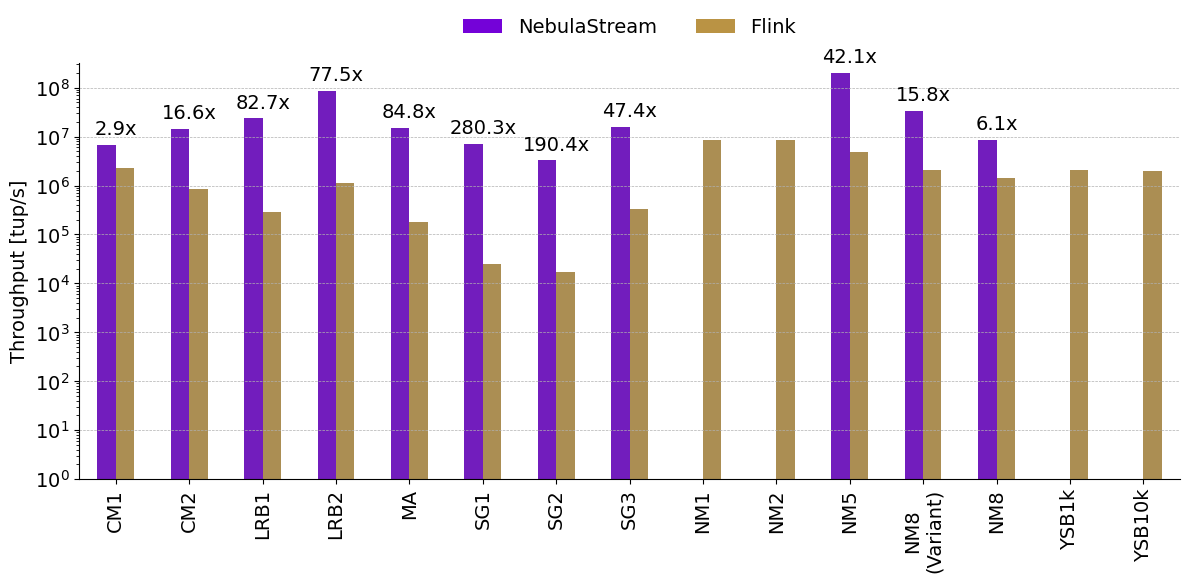

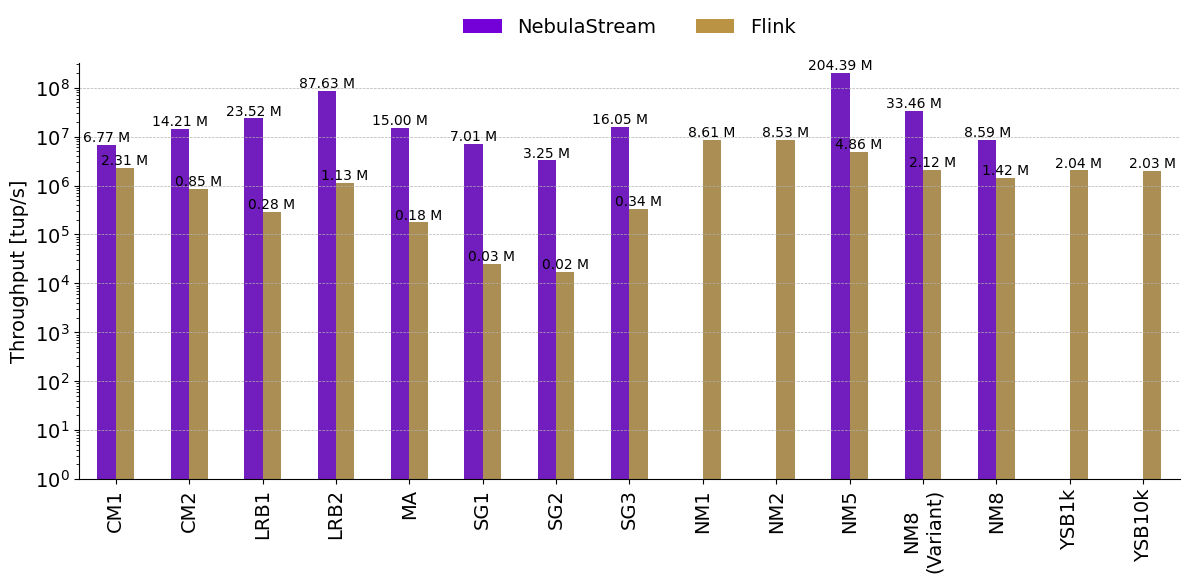

In [2]:
# Filter data for numberOfWorkerThreads == 16
noThreads = 16
cacheType = "SECOND_CHANCE"
df_filtered = df_concatenated[df_concatenated['parallelism'] == noThreads]
df_filtered = df_filtered[(df_filtered['system'] == 'Flink') | ((df_filtered['system'] == 'NebulaStream') & (df_filtered['sliceCacheType'] == cacheType))]
hue_order = ['NebulaStream', 'Flink']
x_order = ["CM1", "CM2", "LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM1", "NM2", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]


#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for pid, p in enumerate(ax.patches):
    pos_baseline = pid
    if pos_baseline >= (len(ax.patches) // 2 - 1):
        pos_baseline -= (len(ax.patches) // 2 - 1)
    baseline_height = ax.patches[pos_baseline].get_height()
    if pid >= (len(ax.patches) // 2 - 1) and p.get_height() > 0:
        speedup = baseline_height / p.get_height()
        print(pid, p.get_height(), pid//2, speedup, pos_baseline)
        ax.annotate(f'{speedup:.1f}x',
                    (p.get_x(), baseline_height * 1.5),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points', fontsize=14, rotation=0)

plt.legend(title='', handles=legend_handles, fontsize=14, title_fontsize=14, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'system_comparison_listener.pdf'))
plt.show()
plt.close()

# Filter data for numberOfWorkerThreads == 16
df_filtered = df_concatenated[df_concatenated['parallelism'] == noThreads]
df_filtered = df_filtered[(df_filtered['system'] == 'Flink') | ((df_filtered['system'] == 'NebulaStream') & (df_filtered['sliceCacheType'] == cacheType))]


#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f} M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='', handles=legend_handles, fontsize=14, title_fontsize=14, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.show()
plt.close()

15 2305129.0 7 2.842757521568603 0
16 853707.0 8 15.382532304194571 1
17 284336.0 8 451.9770009047943 2
18 1130869.0 9 9.264586814623037 3
19 176949.0 9 78.89902320132303 4
20 25001.0 10 205.56818405810975 5
21 17091.0 10 36.897766305992505 6
22 338790.0 11 52.176097372062515 7
23 8613297.0 11 48.658959981017546 8
24 8532161.0 12 241.83401991928127 9
25 4856945.0 12 62.061496136507 10
26 2120603.0 13 16.153719597374735 11
27 1415534.0 13 6.768232396774581 12
28 2035617.0 14 66.9593586975596 13
29 2028299.0 14 61.77358073379494 14


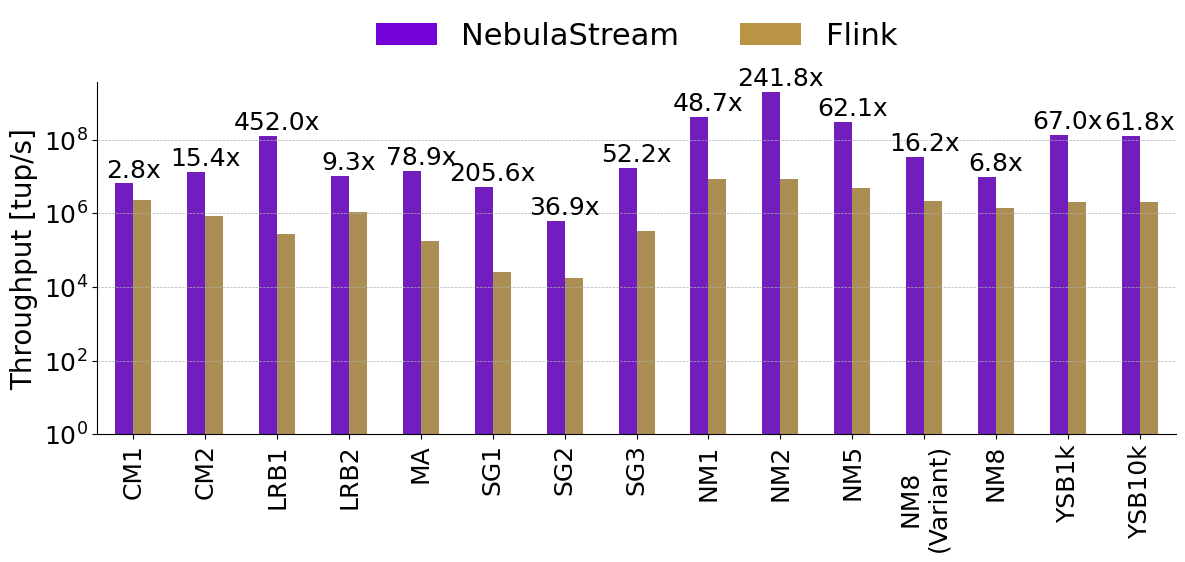

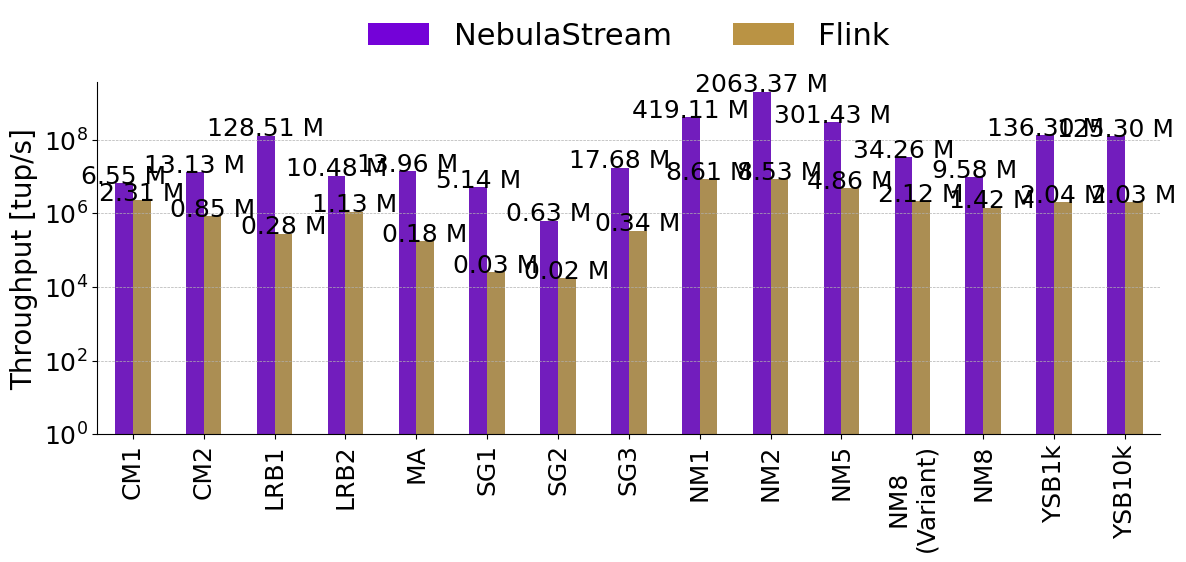

In [3]:
# Filter data for numberOfWorkerThreads == 16
noThreads = 16
cacheType = "SECOND_CHANCE"
df_filtered = df_concatenated[df_concatenated['parallelism'] == noThreads]
df_filtered = df_filtered[(df_filtered['system'] == 'Flink') | ((df_filtered['system'] == 'NebulaStream') & (df_filtered['sliceCacheType'] == cacheType))]
hue_order = ['NebulaStream', 'Flink']
x_order = ["CM1", "CM2", "LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM1", "NM2", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]

#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for pid, p in enumerate(ax.patches):
    pos_baseline = pid
    if pos_baseline >= (len(ax.patches) // 2 - 1):
        pos_baseline -= (len(ax.patches) // 2 - 1)
    baseline_height = ax.patches[pos_baseline].get_height()
    if pid >= (len(ax.patches) // 2 - 1) and p.get_height() > 0:
        speedup = baseline_height / p.get_height()
        print(pid, p.get_height(), pid//2, speedup, pos_baseline)
        ax.annotate(f'{speedup:.1f}x',
                    (p.get_x(), baseline_height * 1.5),
                    ha='center', va='center', xytext=(0, 5), fontsize = 18,
                    textcoords='offset points', rotation=0)

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'system_comparison_abs.pdf'))
plt.show()
plt.close()


#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='system', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f} M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), fontsize = 18,
                textcoords='offset points')

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=hue_order,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.show()
plt.close()

15 2989777.5954386145 7 2.191776007999206 0
16 8597535.869569313 8 1.5274348028366973 1
17 3839425.1946758023 8 33.47202406950844 2
18 2429400.60042039 9 4.312600410427562 3
19 3327075.508005515 9 4.1962087192966 4
20 3204888.499164332 10 1.6036159045710614 5
21 579619.7938236765 10 1.0879885929629862 6
22 3281903.2207777444 11 5.386124708604914 7
23 419348595.1045216 11 0.9994407491055392 8
24 2054146076.2749476 12 1.0044888321527203 9
25 5711654.247592364 12 52.774425811889536 10
26 3559778.504716283 13 9.62296564069001 11
27 3490936.723386989 13 2.744439053664807 12
28 10602783.19019082 14 12.855455631682787 13
29 10513130.846021228 14 11.917980843565214 14


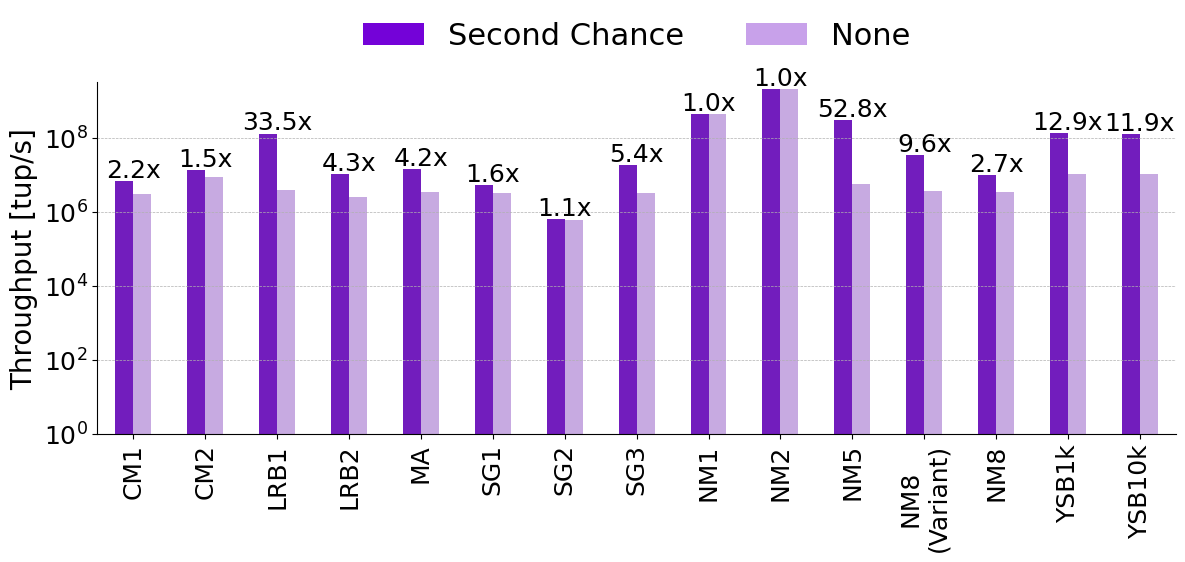

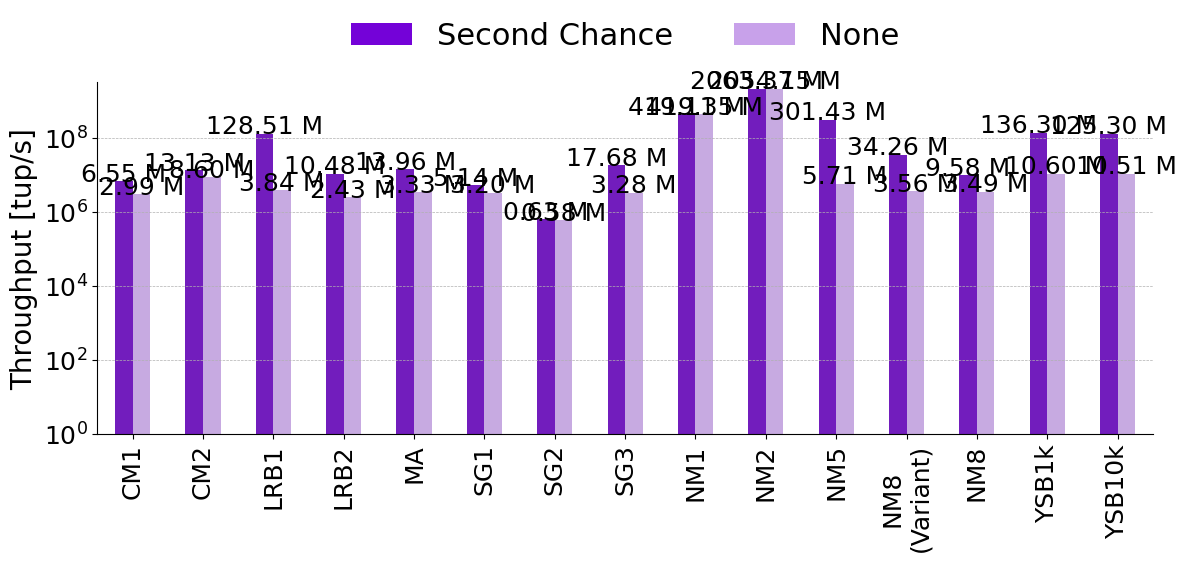

In [4]:
# Filter data for numberOfWorkerThreads == 16
custom_palette = ["#7402d8", "#c8a1ea"]
legend_handles = [
    Patch(facecolor=custom_palette[0], label='Second Chance'),
    Patch(facecolor=custom_palette[1], label='None')
]
legend_labels = ["Second Chance", "None"]

noThreads = 16
system = "NebulaStream"
df_filtered = df_concatenated[df_concatenated['system'] == system]
df_filtered = df_filtered[df_filtered['parallelism'] == noThreads]
hue_order = ['SECOND_CHANCE', 'NONE']
x_order = ["CM1", "CM2", "LRB1", "LRB2", "MA", "SG1", "SG2", "SG3", "NM1", "NM2", "NM5", "NM8\n(Variant)", "NM8", "YSB1k", "YSB10k"]

#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='sliceCacheType', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for pid, p in enumerate(ax.patches):
    pos_baseline = pid
    if pos_baseline >= (len(ax.patches) // 2 - 1):
        pos_baseline -= (len(ax.patches) // 2 - 1)
    baseline_height = ax.patches[pos_baseline].get_height()
    if pid >= (len(ax.patches) // 2 - 1) and p.get_height() > 0:
        speedup = baseline_height / p.get_height()
        print(pid, p.get_height(), pid//2, speedup, pos_baseline)
        ax.annotate(f'{speedup:.1f}x',
                    (p.get_x(), baseline_height * 1.25),
                    ha='center', va='center', xytext=(0, 5), fontsize = 18,
                    textcoords='offset points', rotation=0)

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'system_comparison_cache_with_and_without_abs.pdf'))
plt.show()
plt.close()

# Filter data for numberOfWorkerThreads == 16
noThreads = 16
system = "NebulaStream"
df_filtered = df_concatenated[df_concatenated['system'] == system]
df_filtered = df_filtered[df_filtered['parallelism'] == noThreads]
hue_order = ['SECOND_CHANCE', 'NONE']

#df_filtered = df_concatenated
# Create and save the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='query_name', y='tuplesPerSecond_e2e', hue='sliceCacheType', palette=custom_palette, hue_order=hue_order, order=x_order, dodge=0.2, width=0.5)
#plt.title(f'Tuples per Second for numberOfWorkerThreads == {noThreads}')
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("")
plt.ylabel("Throughput [tup/s]", fontsize=20)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(1)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bars with values in millions per second
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f} M',
                (p.get_x() + p.get_width() / 2., p.get_height()), fontsize = 18,
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='', handles=legend_handles, fontsize=22, title_fontsize=22, labels=legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False)        
plt.tight_layout()
plt.show()
plt.close()

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


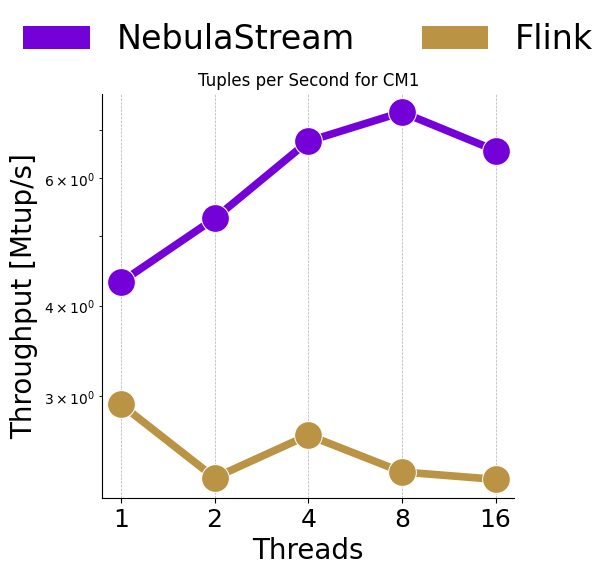

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


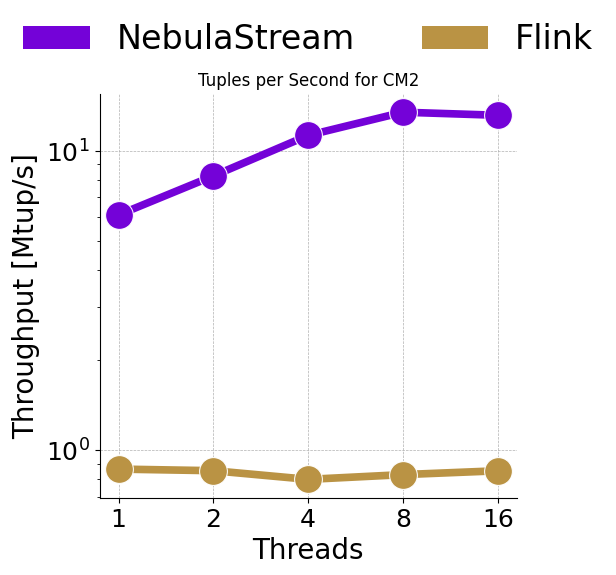

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


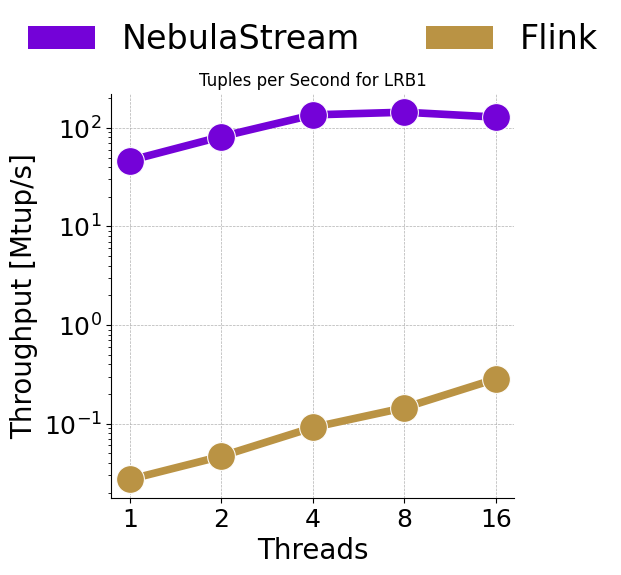

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


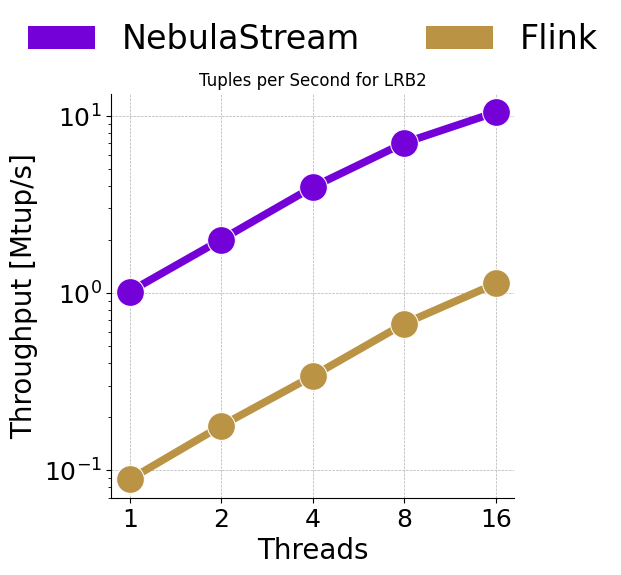

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


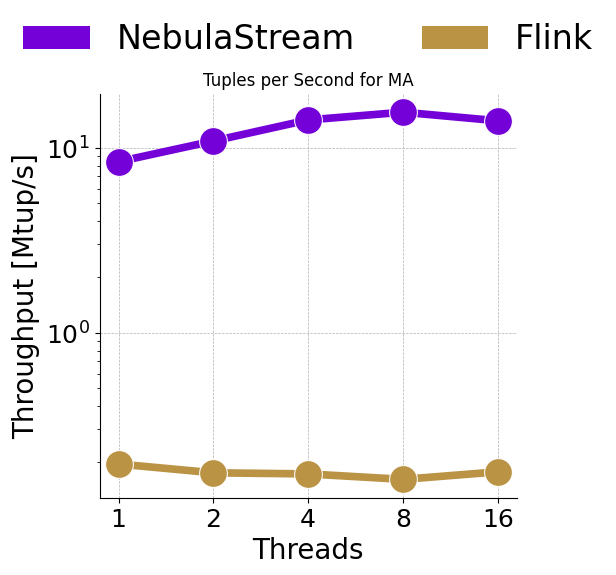

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


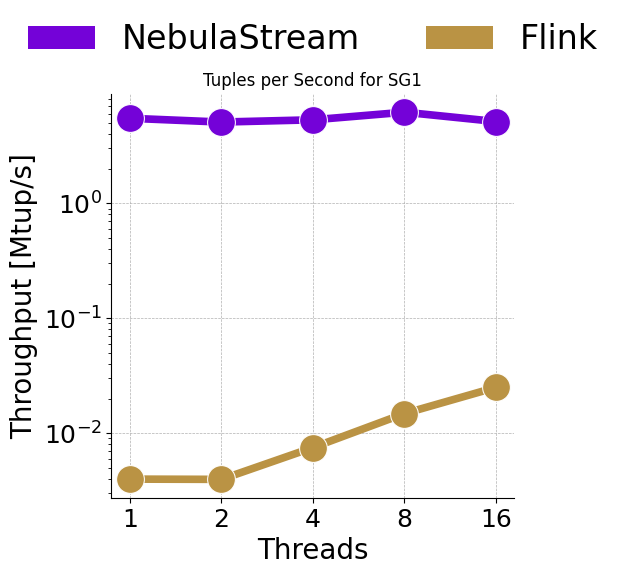

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


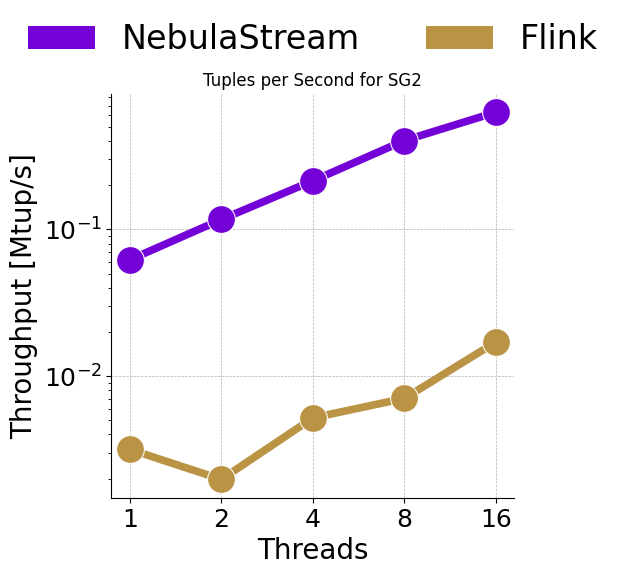

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


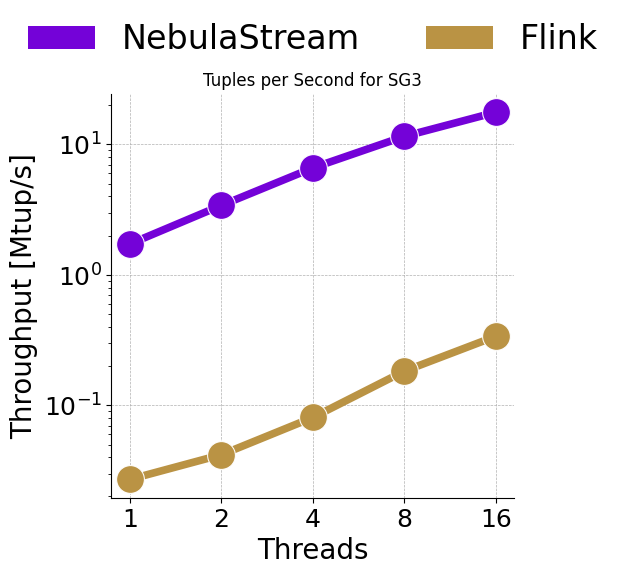

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


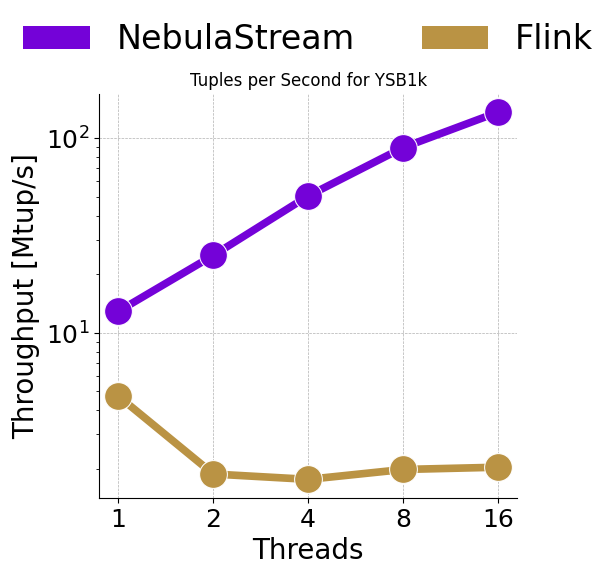

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


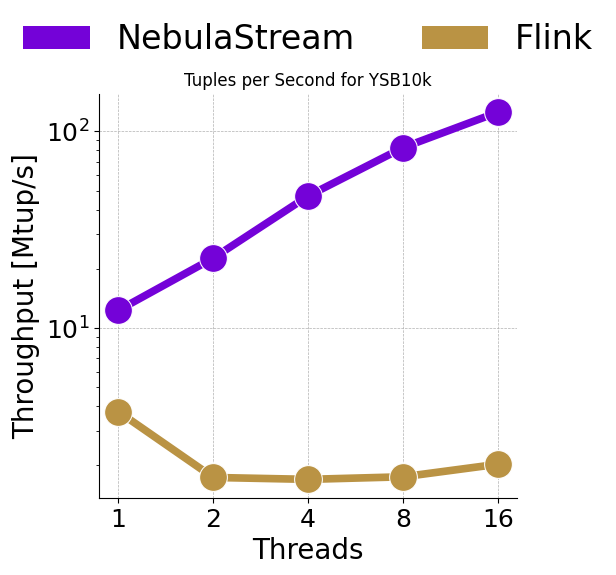

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


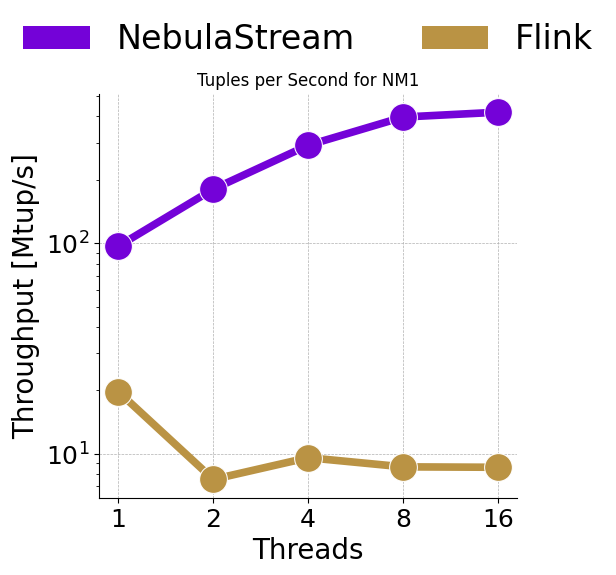

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


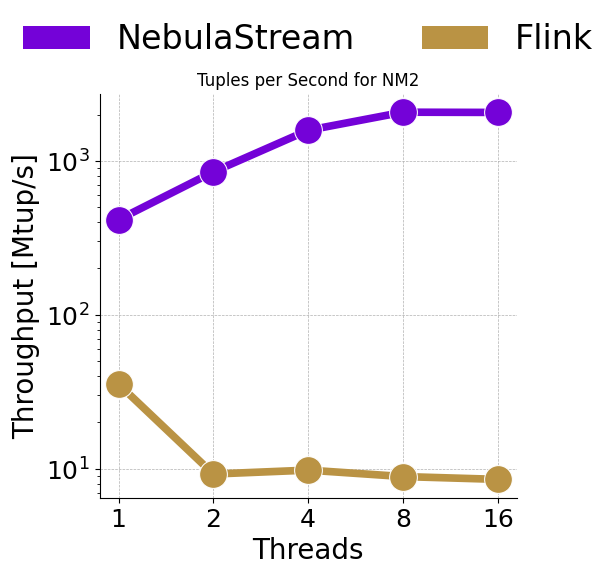

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


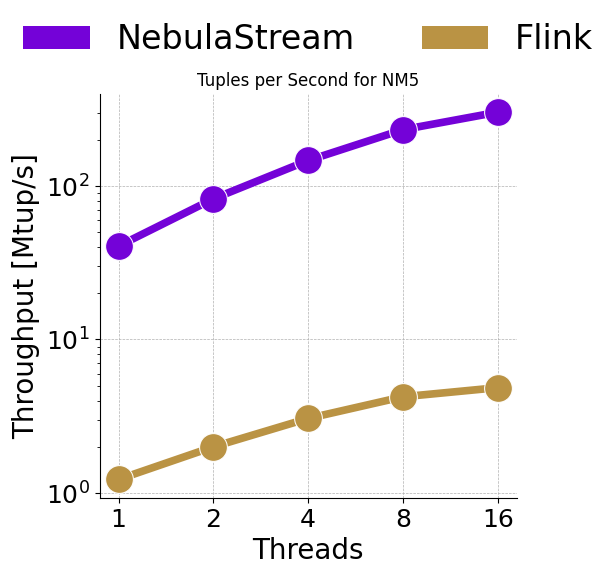

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


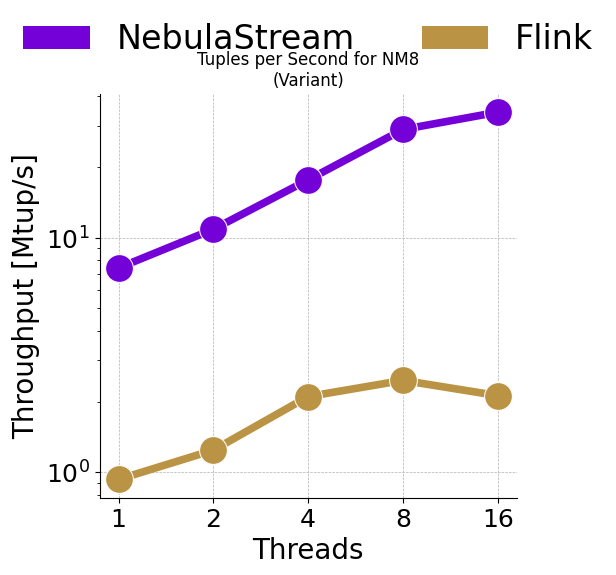

/tmp/ipykernel_23057/410835538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
/tmp/ipykernel_23057/410835538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['parallelism_str'] = df_query['parallelism'].astype(str)


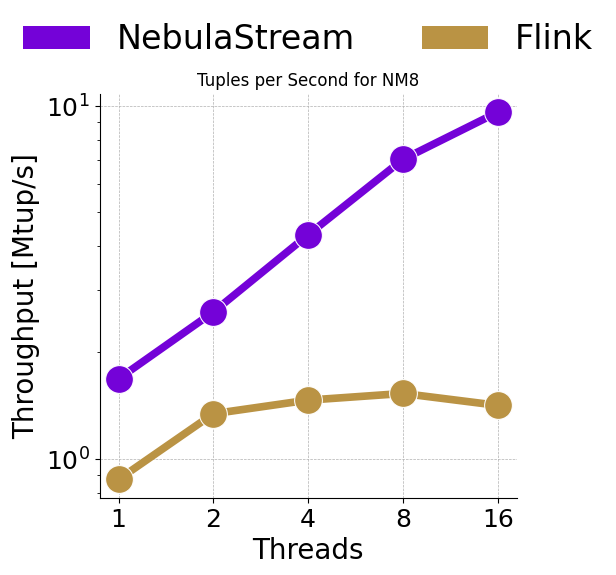

In [5]:
# Create and save line plots for each query_name
hue_order = ['NebulaStream', 'Flink']
custom_palette = ["#7402d8", "#ba9344"]
legend_handles = [
    Patch(facecolor=custom_palette[0], label='NebulaStream'),
    Patch(facecolor=custom_palette[1], label='Flink')
]
queries = df_concatenated['query_name'].unique()
cacheType = "SECOND_CHANCE"
df_filtered = df_concatenated[(df_concatenated['system'] == 'Flink') | ((df_concatenated['system'] == 'NebulaStream') & (df_concatenated['sliceCacheType'] == cacheType))]

for query in queries:
    df_query = df_filtered[df_filtered['query_name'] == query]
    df_query['millionTuplesPerSecond'] = df_query['tuplesPerSecond_e2e'] / 1e6
    df_query['parallelism_str'] = df_query['parallelism'].astype(str)
    plt.figure(figsize=(6, 6))
    ax = sns.lineplot(data=df_query, x='parallelism_str', y='millionTuplesPerSecond', hue='system', marker='o', markersize=20, linewidth=5.5, palette=custom_palette, hue_order=hue_order)
    
    plt.legend(title='', handles=legend_handles, fontsize=24, title_fontsize=14, labels=hue_order,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.25),
        ncol=2,
        frameon=False)
    plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(f'Tuples per Second for {query}')
    plt.xticks(rotation=0, fontsize=18)
    plt.xlabel("Threads", fontsize=20)
    plt.ylabel("Throughput [Mtup/s]", fontsize=20)
    plt.yscale('log')
    plt.yticks(fontsize=18)
    #plt.ylim(1)
    plt.tight_layout()
    query_name = str(query).replace("NM8\n(Variant)", "NM8_Variant")
    filename = f"{query_name}_parallelism_tuplesPerSecond.pdf"
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()
    plt.close()